In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from datetime import datetime, timedelta
import datetime as dt
import timeit
import math
%matplotlib inline

### Remove Rows with 'FEDEX'

In [2]:
data = pd.read_csv('HW5_cleaned_df.csv').iloc[:,1:]
df = data[~data["Merch description"].str.contains("FEDEX")]
df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
7,8,5142191182,1/1/10,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,1/1/10,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
13,14,5142124791,1/1/10,5725000466504,CDW*GOVERNMENT INC,IL,60061.0,P,106.89,0
...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96393,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96394,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96395,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [3]:
print(data.shape)
print(df.shape)
print("removed", len(data)-len(df), "rows that contain 'FEDEX'")

(96397, 10)
(84622, 10)
removed 11775 rows that contain 'FEDEX'


### Get the first digit from 'Amount'

In [4]:
amount_first_digit = list(df["Amount"])
for i in range(len(amount_first_digit)):
    while amount_first_digit[i]>=10:
        amount_first_digit[i] = amount_first_digit[i]/10
    while amount_first_digit[i]<1:
        amount_first_digit[i] = amount_first_digit[i]*10
    amount_first_digit[i] = int(amount_first_digit[i])

for num in range(0,10):
    print("The count of first digit with", num, "is:", amount_first_digit.count(num))

The count of first digit with 0 is: 0
The count of first digit with 1 is: 25697
The count of first digit with 2 is: 15827
The count of first digit with 3 is: 10297
The count of first digit with 4 is: 7686
The count of first digit with 5 is: 6749
The count of first digit with 6 is: 5469
The count of first digit with 7 is: 4699
The count of first digit with 8 is: 4152
The count of first digit with 9 is: 4046


In [5]:
df["first_digit"] = amount_first_digit

<ipython-input-5-63e6a85cef62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["first_digit"] = amount_first_digit


Text(0.5, 0, 'first_digit')

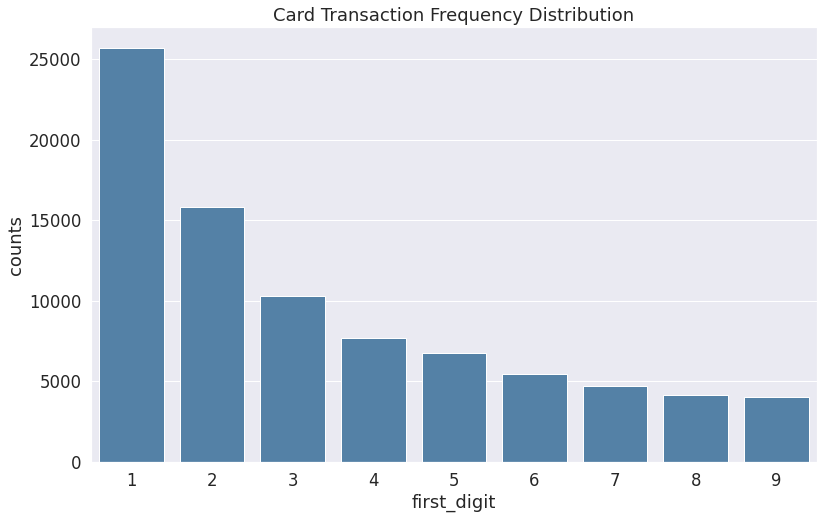

In [11]:
first_digit_df = df.groupby('first_digit')['first_digit'].count().to_frame(name='counts').reset_index()
plt.rcParams["figure.figsize"] = [13,8]
sns.set(font_scale=1.5)
plot = sns.barplot(x='first_digit', y='counts', data = first_digit_df, color = "steelblue") 
plt.title("Card Transaction Frequency Distribution")
plt.ylabel("counts")
plt.xlabel("first_digit")

Text(0.5, 0, 'first_digit')

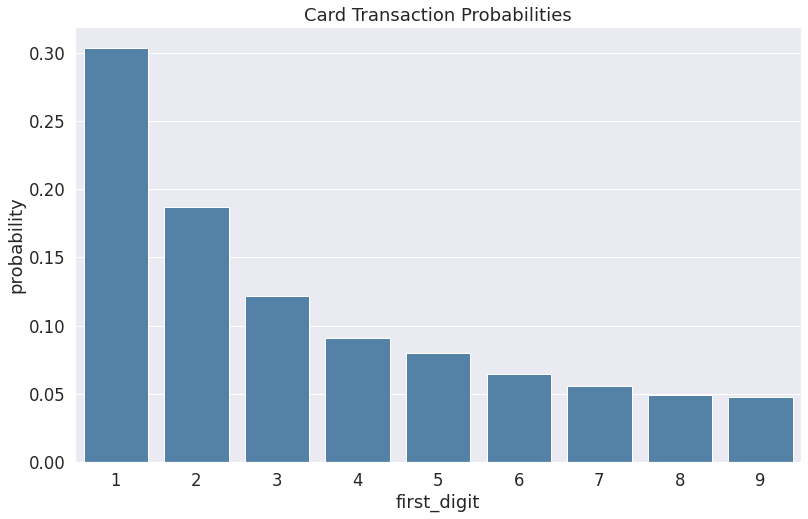

In [10]:
first_digit_df["prob"] = first_digit_df.counts / first_digit_df.counts.sum()
plt.rcParams["figure.figsize"] = [13,8]
sns.set(font_scale=1.5)
plot = sns.barplot(x='first_digit', y='prob', data = first_digit_df, color = "steelblue") 
plt.title("Card Transaction Probabilities")
plt.ylabel("probability")
plt.xlabel("first_digit")

In [9]:
first_digit_df

,first_digit,counts,prob
0,1,25697,0.303668
1,2,15827,0.187032
2,3,10297,0.121682
3,4,7686,0.090827
4,5,6749,0.079755
5,6,5469,0.064629
6,7,4699,0.055529
7,8,4152,0.049065
8,9,4046,0.047813


### Cardnum

In [6]:
Cardnum_df = df.copy()
Cardnum_df["n_low"] = (Cardnum_df.first_digit <= 2).astype(int)
Cardnum_df["n_high"] = (Cardnum_df.first_digit > 2).astype(int)
Cardnum_df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,first_digit,n_low,n_high
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,3,0,1
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,1,1,0
7,8,5142191182,1/1/10,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0,2,1,0
8,9,5142258629,1/1/10,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0,6,0,1
13,14,5142124791,1/1/10,5725000466504,CDW*GOVERNMENT INC,IL,60061.0,P,106.89,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,8,0,1
96393,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,1,1,0
96394,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,3,0,1
96395,96752,5142244619,12/31/10,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,2,1,0


In [14]:
Cardnum_Benfords_low = Cardnum_df.groupby("Cardnum")["n_low"].sum().to_frame(name='n_low').reset_index().replace(0, 1)
Cardnum_Benfords_high = Cardnum_df.groupby("Cardnum")["n_high"].sum().to_frame(name='n_high').reset_index().replace(0, 1)
Cardnum_Benfords = Cardnum_Benfords_low.merge(Cardnum_Benfords_high)
Cardnum_Benfords["R"] = 1.096 * Cardnum_Benfords.n_low / Cardnum_Benfords.n_high
Cardnum_Benfords["1/R"] = 1 / Cardnum_Benfords["R"]
Cardnum_Benfords["U"] = Cardnum_Benfords[["R", "1/R"]].max(axis = 1)
Cardnum_Benfords_n = Cardnum_df.groupby("Cardnum")["Cardnum"].count().to_frame(name='n').reset_index()
Cardnum_Benfords = Cardnum_Benfords.merge(Cardnum_Benfords_n, on = "Cardnum")
nmid = 15
c = 3
Cardnum_Benfords["t"] = (Cardnum_Benfords.n - nmid) / c
Cardnum_Benfords["U*"] = 1 + ((Cardnum_Benfords.U - 1) / (1 + np.exp(-Cardnum_Benfords.t)))
Cardnum_Benfords = Cardnum_Benfords.sort_values("U*", ascending = False)
Cardnum_Benfords_top40 = Cardnum_Benfords.head(40)
Cardnum_Benfords_top40
#Cardnum_Benfords_top40.to_csv("HW7_top40 Cardnum.csv")

,Cardnum,n_low,n_high,R,1/R,U,n,t,U*
1177,5142253356,61,5,13.371200,0.074788,13.371200,66,17.000000,13.371199
1541,5142299705,25,3,9.133333,0.109489,9.133333,28,4.333333,9.027976
725,5142197563,15,134,0.122687,8.150852,8.150852,149,44.666667,8.150852
697,5142194617,5,33,0.166061,6.021898,6.021898,38,7.666667,6.019548
1449,5142288241,1,13,0.084308,11.861314,11.861314,14,-0.333333,5.533836
1061,5142239140,16,3,5.845333,0.171077,5.845333,19,1.333333,4.834555
284,5142144931,6,30,0.219200,4.562044,4.562044,36,7.000000,4.558799
680,5142192606,13,2,7.124000,0.140371,7.124000,15,0.000000,4.062000
787,5142204384,199,54,4.038963,0.247588,4.038963,253,79.333333,4.038963
1418,5142284940,21,6,3.836000,0.260688,3.836000,27,4.000000,3.784991


### Merchnum

In [19]:
Merchnum_df = df.copy()
Merchnum_df["n_low"] = (Merchnum_df.first_digit <= 2).astype(int)
Merchnum_df["n_high"] = (Merchnum_df.first_digit > 2).astype(int)

Merchnum_Benfords_low = Merchnum_df.groupby("Merchnum")["n_low"].sum().to_frame(name='n_low').reset_index().replace(0, 1)
Merchnum_Benfords_high = Merchnum_df.groupby("Merchnum")["n_high"].sum().to_frame(name='n_high').reset_index().replace(0, 1)
Merchnum_Benfords = Merchnum_Benfords_low.merge(Merchnum_Benfords_high)
Merchnum_Benfords["R"] = 1.096 * Merchnum_Benfords.n_low / Merchnum_Benfords.n_high
Merchnum_Benfords["1/R"] = 1 / Merchnum_Benfords["R"]
Merchnum_Benfords["U"] = Merchnum_Benfords[["R", "1/R"]].max(axis = 1)
Merchnum_Benfords_n = Merchnum_df.groupby("Merchnum")["Merchnum"].count().to_frame(name='n').reset_index()
Merchnum_Benfords = Merchnum_Benfords.merge(Merchnum_Benfords_n, on = "Merchnum")
nmid = 15
c = 3
Merchnum_Benfords["t"] = (Merchnum_Benfords.n - nmid) / c
Merchnum_Benfords["U*"] = 1 + ((Merchnum_Benfords.U - 1) / (1 + np.exp(-Merchnum_Benfords.t)))
Merchnum_Benfords = Merchnum_Benfords.sort_values("U*", ascending = False)
Merchnum_Benfords_top40 = Merchnum_Benfords.head(40)
Merchnum_Benfords_top40
#Merchnum_Benfords_top40.to_csv("HW7_top40 Merchnum.csv")

,Merchnum,n_low,n_high,R,1/R,U,n,t,U*
12842,991808369338,1,181,0.006055,165.145985,165.145985,181,55.333333,165.145985
9820,8078200641472,59,1,64.664000,0.015465,64.664000,60,15.000000,64.663981
1949,308904389335,1,53,0.020679,48.357664,48.357664,53,12.666667,48.357515
2348,3523000628102,34,1,37.264000,0.026836,37.264000,34,6.333333,37.199706
9914,808998385332,1,36,0.030444,32.846715,32.846715,37,7.333333,32.825921
4980,55158027,27,1,29.592000,0.033793,29.592000,28,4.333333,29.221627
10740,8916500620062,1,31,0.035355,28.284672,28.284672,31,5.333333,28.153575
2603,3910694900001,25,1,27.400000,0.036496,27.400000,26,3.666667,26.741995
10662,8889817332,24,1,26.304000,0.038017,26.304000,25,3.333333,25.432399
10516,881145544,24,1,26.304000,0.038017,26.304000,24,3.000000,25.103936
